In [1]:
import numpy as np
import matplotlib.pyplot as plt
import initialization
import solver
% matplotlib inline

In [2]:
frame,z,t,N, Sol, Om_s_bc, Om_c_bc, dt, i_t, c, \
    Gam_eg, Gam_re, gam_gr, gs, gc, Del_s, Del_c, chebDiffMatrix_norm, Om0_s, Om0_c =\
    initialization.init()

step size (cdt/dz): 0.01
number of spatial steps over the cloud: 48.0
number of temporal steps over the signal pulse: 595.0
(total) number of temporal steps: 35714.0
(total) number of spatial steps: 51
c**2: 25689.14
theoretical linear absorption 0.0010
coupling pulse energy (nJ): 0.7, 0.7


In [3]:
SampleOm_s, SampleOm_c, SamplePg, SamplePe, SamplePr, SampleSge, SampleSer, SampleSgr, tFrame =\
    solver.solve(frame,z,t,N, Sol, Om_s_bc, Om_c_bc, dt, i_t, c, \
    Gam_eg, Gam_re, gam_gr, gs, gc, Del_s, Del_c, chebDiffMatrix_norm)

solver.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  SamplePg[j] = Sol[2] * N
solver.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  SamplePe[j] = Sol[3] * N
solver.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  SamplePr[j] = Sol[4] * N


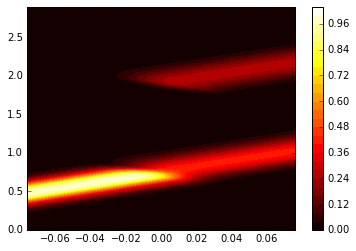

In [4]:
plt.contourf(z,tFrame*1e9, abs(SampleOm_s/Om0_s)**2,30, cmap=plt.cm.hot)
plt.colorbar()

<IPython.core.display.Javascript object>


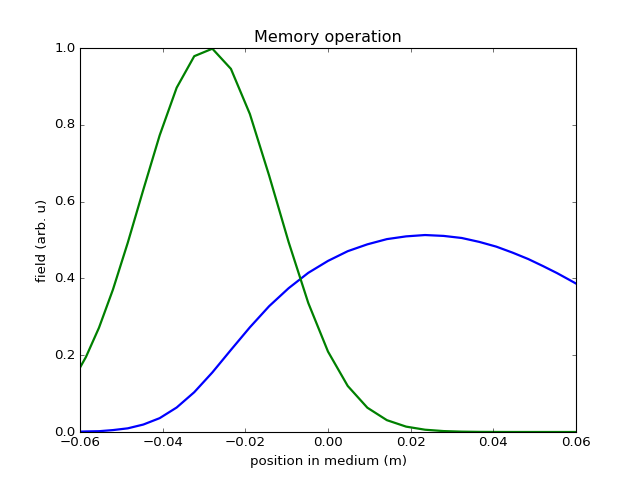

In [5]:
from matplotlib import animation
%matplotlib nbagg

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-0.06, 0.06), ylim=(0, 1), xlabel='position in medium (m)', ylabel='field (arb. u)')
plt.title('Memory operation')

lines = [ax.plot([], [], lw=2)[0] for _ in range(2)]

# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines

# animation function.  This is called sequentially
def animate(i):
    y = np.zeros((2,SampleOm_s.shape[1]))
    y[0,:] = abs(SampleOm_s)[i]/Om0_s
    y[1,:] = abs(SampleOm_c)[i]/Om0_c
    for j, line in enumerate(lines):
        line.set_data(z,y[j,:])
    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame, interval=20, blit=True)

plt.show()

In [6]:
# save the animation as an mp4.
plt.rcParams['animation.ffmpeg_path'] = 'c:/ffmpeg/bin/ffmpeg'
mywriter = animation.FFMpegWriter()
anim.save('memoryOperation.mp4', fps=30, writer=mywriter, extra_args=['-vcodec', 'libx264'])